## カリキュラム - 【AIコース】 教師なし学習　クラスタリング４（演習）
  
#### 提出するもの:  
何種類のワインを置くことにしたかを答えてください。  
答えるのは2〜20の数字ということになります。  
なぜその数にしたのかという説明を、根拠としたコードと一緒に教えてください。  
クラスタリングにおいてクラスタ数を決めるのは人間ですが、その手助けとなる方法がいくつかありました。  
例えば2回目に学んだエルボー法やシルエット図、3回目で学んだ樹状図です。  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples =    100,  # サンプル数
                  n_features =   20,   # 特徴量(説明変数)の数
                  centers =      15,   # クラスタの数
                  cluster_std =  2.0,  # クラスタ内の標準偏差(ばらつき度合い)
                  shuffle =      True, # サンプルをシャッフル
                  random_state = 0     # 乱数生成を固定
                 )
variables = ["辛さ","重厚","スパイシー","果実味","コク","酸味","落ち着き","香り","華やか","ジューシー",
             "熟成","透明感","シャープ","力強い","フレッシュ","渋み","苦味","樽","エキゾチック","粘性"]
name = list(map(str, [i for i in range(100)]))
df = pd.DataFrame(X, columns = variables, index = name)

In [2]:
# df.head()

plt.figure(figsize = (5, 5))
plt.scatter(X[:,0], X[:,1], c = "y", marker = "o", s = 50)
plt.grid()
plt.show()

#### 分析手法１ - k-meansのエルボー法:

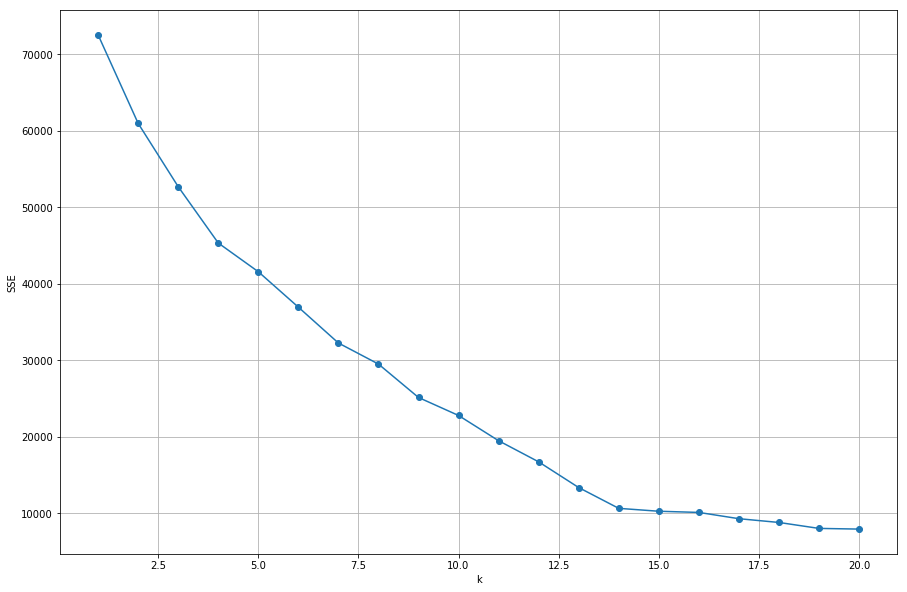

In [3]:
from sklearn.cluster import KMeans
SSE = []
for i in range(1, 21):
    km = KMeans(n_clusters =   i,        # クラスタの数(中心点の数)kを決める
                init =         "random", # 中心点の初期値の取り方のrandomかk-means++かで指定
                n_init =       10,       # k-means自体を繰り返す回数
                max_iter =     1000,     # 割り当てクラスタの作成とクラスタの中心の計算を繰り返す最大回数
                tol =          1e-04,    # 終了判定に使われる許容値
                random_state = 0         # 中心点の初期値のための乱数の状態を固定
               )
    km.fit(X)
    SSE.append(km.inertia_)

plt.figure(figsize = (15, 10))
plt.plot(range(1, 21), SSE, marker = "o")
plt.xlabel("k")
plt.ylabel("SSE")
plt.grid()
plt.show()

#### 分析手法１での結論:  
エルボー法では「14」あたりで大きくグラフが曲がるため、クラスタ数は「14」あたりが最適  

#### 分析手法２ - シルエット分析:

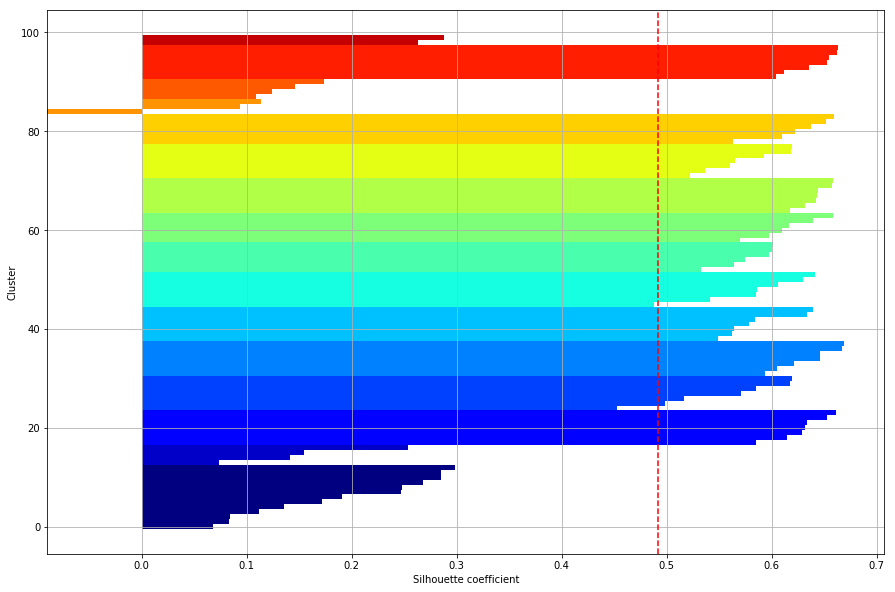

In [4]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
km = KMeans(n_clusters =   16,
            init =         "random",
            n_init =       10,
            max_iter =     1000,
            tol =          1e-04,
            random_state = 0
           )
y_km =                   km.fit_predict(X)
cluster_labels =         np.unique(y_km)
n_clusters =             cluster_labels.shape[0]
silhouette_vals =        silhouette_samples(X, y_km, metric = "euclidean")
y_ax_lower, y_ax_upper = 0, 0
yticks =                 []
plt.figure(figsize = (15, 10))  # グラフのサイズはpltを一番最初に呼び出す時に指定する
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = "none", color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = "red", linestyle = "--")
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.grid()
plt.show()

#### 分析手法２での結論:  
シルエット分析では「16」のグラフが均一のため、クラスタ数は「16」あたりが最適  

##### 分析手法３ - 階層的手法:

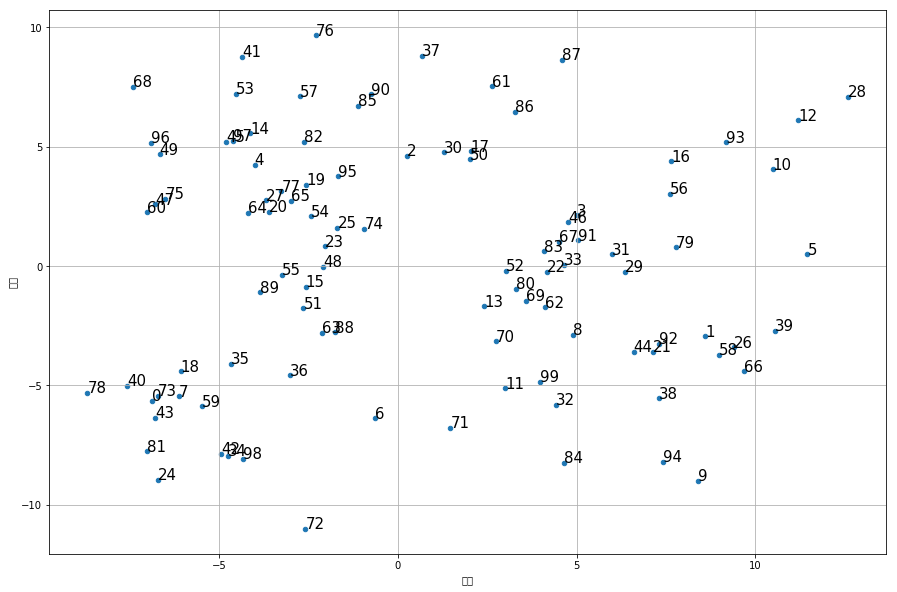

In [5]:
fig, ax = plt.subplots(figsize = (15, 10))  # suplots内でもfigsizeが使える
df.plot(0, 1, kind = "scatter", ax = ax)
for k, v in df.iterrows():
    ax.annotate(k, xy = (v[0], v[1]), size = 15)

plt.grid()
plt.show()

In [6]:
from scipy.spatial.distance import pdist, squareform
plt.figure(figsize = (18, 15))
row_dist = pd.DataFrame(squareform(pdist(df, metric = "euclidean")), columns = name, index = name)
print(row_dist)

            0          1          2          3          4          5  \
0    0.000000  52.624242  41.002106  41.625637  39.249034  47.701933   
1   52.624242   0.000000  41.518133  32.704102  38.814321  30.022858   
2   41.002106  41.518133   0.000000  32.868977  33.399859  27.233159   
3   41.625637  32.704102  32.868977   0.000000  31.392470  33.169500   
4   39.249034  38.814321  33.399859  31.392470   0.000000  43.270015   
5   47.701933  30.022858  27.233159  33.169500  43.270015   0.000000   
6   32.179620  42.322500  42.507352  33.098625  34.126482  41.115787   
7   49.747503  34.028919  41.581994  42.137292  42.763238  35.980141   
8   49.666381  36.617068  41.808531  25.761110  39.462839  43.620806   
9   35.879622  43.626511  39.744987  38.883694  40.779959  39.486565   
10  50.838865  31.601004  26.357573  32.980938  41.791916  10.787777   
11  47.315310  33.713137  39.040665  34.561621  44.266361  30.931352   
12  47.588165  31.706927  25.667231  32.767814  41.475880  12.23

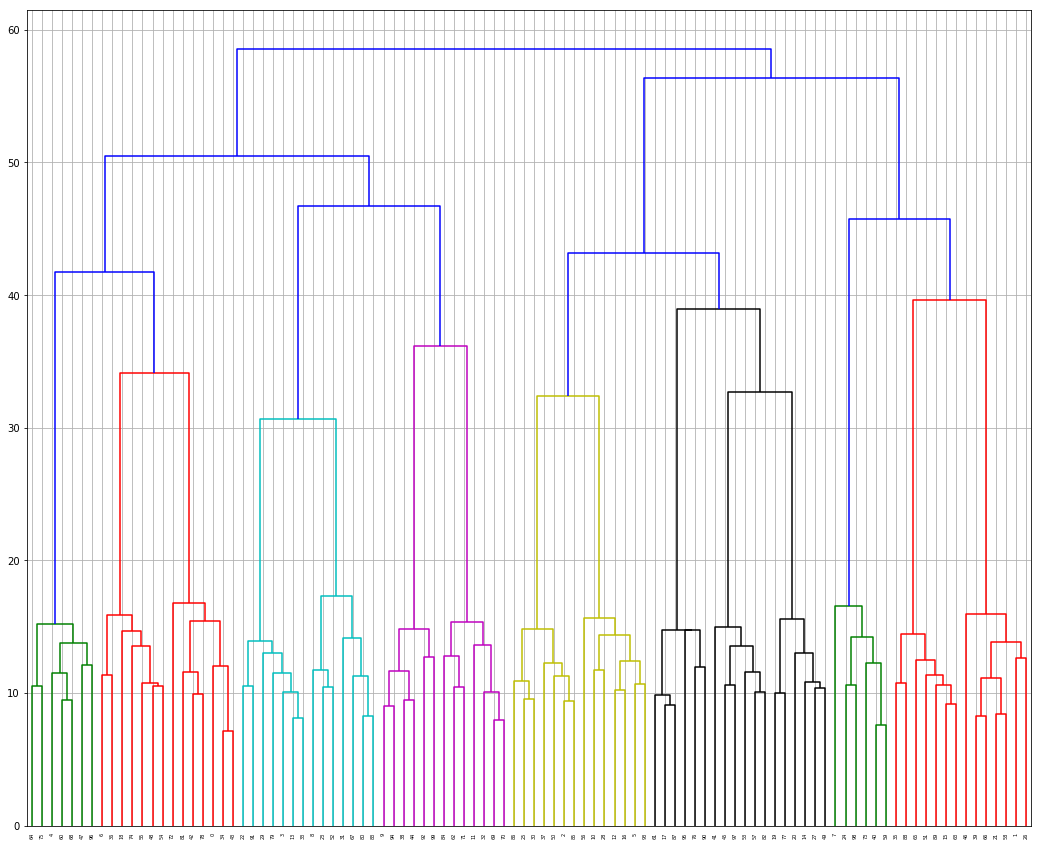

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
row_clusters = linkage(pdist(df, metric = "euclidean"), method = "complete")
row_dender = dendrogram(row_clusters, labels = name)

plt.grid()
plt.show()

#### 分析手法３での結論:  
階層的手法では「15」のグラフが均一のため、クラスタ数は「15」あたりが最適  

### 結論:
クラスタ数は「15」とする。  
その根拠は、エルボー法でのクラスタ数「14」、シルエット分析での「16」、階層的手法での「15」の結果の平均としたため。